In [1]:
# Explanation of Columns:
opened_case_name = "Package plan status ha jis mn patient ki number of appointment hoti hn. Plan uska expire hogya ha ya open ha."
total_closed_invoices_before_appt = "Is appointemnt ka cancel krny sa pala kitni invoices paid kii hui hn patient na."
total_good_appointments_before_cancelled_appt = "Cancel wali appointemnt sa pala us na kitni achi appointemnts li hn. Jo complete hui hn."
total_cancel_appt_before_cancelled_appt = "Cancel wali appointemnt sa pala us na kitni appointemnts cancel ki hn."
patient_status = "Patient ka status kya ha? Uska followup chal raha ha ya treatment end hogya tha. Diffrent type."
patient_type = "Ya patient ki type ha, wo pala sa aata ha ya new patient ha, ya clinic mn first time aya ha."
notice = "Appointment sa kitny hours pala is na booking cancel kii ha."
case_type = "Uska konsa package ha. Unlimited appointments wala, ya limited appointments wala."
cancelled_at = "Date and time of appointment cancelation. Kis date pa cancel hui ha appointment."
appointement_type = "Appointement kis ka sath thi. physio k sath, ya nutritionist k sath. whatever the type is."
billable_item = ""
appointemnt_start_time = "Appointment ki date time kya tha?"
Business_name = "Konsa departemnt mn aaya ha wo check karwana."
consession_type = "Wo kis trha ka discount mila ha. Koi discount mila ha ya nahi."
customer_type = "Almost same with consession type."

In [2]:
# Explanation of Columns:
opened_case_name = "This is the package plan status, that either patient plan is expired or open."
total_closed_invoices_before_appt = "How many invoices patient has paid before this appointment."
total_good_appointments_before_cancelled_appt = "How many good appointments patient has taken before this cancelled appointment."
total_cancel_appt_before_cancelled_appt = "How many appointments patient has cancelled before this cancelled appointment."
patient_status = "What is the status of patient. Either his followup is going on or treatment has been ended."
patient_type = "This is the type of patient, either he is old patient or new patient, or first time came to clinic."
notice = "How many hours before appointment he has cancelled the booking."
case_type = "What type of package is this. Either unlimited appointments or limited appointments."
cancelled_at = "Date and time of appointment cancelation. Kis date pa cancel hui ha appointment."
appointement_type = "With whom the appointment was. With physiotherapist, or nutritionist."
billable_item = ""
appointemnt_start_time = "What was the date time of appointment?"
Business_name = "Which department he has visited. Check that."
consession_type = "What type of discount he has availed. Either he has availed any discount or not."
customer_type = "Almost same with consession type."

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

good_apt_df = pd.read_csv("Good_Appt_dataset.csv")
cancelled_apt_df = pd.read_csv("Cancelled_Appt_dataset.csv")
good_apt_df = good_apt_df.rename(columns={'case_status' : 'opened_case_name'})
# Merge both databases
final_df = pd.concat([good_apt_df, cancelled_apt_df], ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9748\2689286144.py:7: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  cancelled_apt_df = pd.read_csv("Cancelled_Appt_dataset.csv")


In [4]:
# deleting duplicate rows
final_df = final_df.drop_duplicates()

In [5]:
# profile = ProfileReport(final_df, title="Profiling Report")
# profile.to_file("DataAnalysisReport.html")

# Exploratory Data Analysis

In [6]:
import matplotlib.pyplot as plt
import plotly.express as px

cancelled_appointments = final_df[final_df['cancelled'] == 'Yes']
Good_appointments = final_df[final_df['cancelled'] == 'No']

# Recurring Patients
### Recurring patients seem to have a higher number of cancellations compared to new patients. This could be due to the frequency of their visits, leading to more opportunities for cancellations.
### New patients also do some cancellations, but this might be due to initial uncertainties or dissatisfaction with the service or getting comment about the service from anyone else.

In [7]:
column_used = "patient_type"

patient_type = cancelled_appointments['patient_type'].value_counts()
# data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(patient_type, x=patient_type.index, y=patient_type.values, labels={'x':'Patient Type', 'y':'Count'}, title='Cancelled Appointments')
fig.show()

In [8]:
column_used = "patient_type"

patient_type = Good_appointments['patient_type'].value_counts()
# data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(patient_type, x=patient_type.index, y=patient_type.values, labels={'x':'Patient Type', 'y':'Count'}, title='Good Appointments')
fig.show()

# Day Time Analysis

In [9]:
import numpy as np

g_apt = good_apt_df['time_of_day'].value_counts()
c_apt = cancelled_appointments['time_of_day'].value_counts()
morning_cancellation_rate = c_apt['Morning'] / (g_apt['Morning'] + c_apt['Morning'])
Afternoon_cancellation_rate = c_apt['Afternoon'] / (g_apt['Afternoon'] + c_apt['Afternoon'])
evening_cancellation_rate = c_apt['Evening'] / (g_apt['Evening'] + c_apt['Evening'])
data = {"Morning" : morning_cancellation_rate, "Afternoon" : Afternoon_cancellation_rate, "Evening" : evening_cancellation_rate}
labels = list(data.keys())
sizes = list(np.array(list(data.values()))*100)

In [10]:
fig = px.bar(g_apt, x=g_apt.index, y=g_apt.values, labels={'x':'Day Time', 'y':'Count'}, title='Good Appointments Day Time')
fig.show()

In [11]:
fig = px.bar(c_apt, x=c_apt.index, y=c_apt.values, labels={'x':'Day Time', 'y':'Count'}, title='Cancelled Appointments Day Time')
fig.show()

In [12]:
import plotly.express as px

fig = px.pie(values=sizes, names=labels, title='Cancellation Rates',
             labels={'labels':'Time of Day', 'values':'Cancellation Rate'})
fig.update_traces(textinfo='label+percent', hoverinfo='label+value', 
                  texttemplate='%{value:.4f}')
fig.show()



# Appointment Status

### This pattren show that most of the patients, who cancel their appointment once more likely to face similar issues resulting in a lower probablity of attending even after re-booking.

In [13]:
column_used = "appointment_status"

apt_status = cancelled_apt_df['appointment_status'].value_counts()

fig = px.pie(values=apt_status.values, names=apt_status.index, title='Appointment Status Of Cancellation',
             labels={'labels':'Appointment Status', 'values':'Cancelled Appointments'})
fig.update_traces(textinfo='label+percent', hoverinfo='label+value', 
                  texttemplate='%{value:.0f}')
fig.show()

In [14]:
column_used = "appointment_status"

apt_status_1 = good_apt_df['appointment_status'].value_counts()

fig = px.pie(values=apt_status_1.values, names=apt_status_1.index, title='Good Appointment',
             labels={'labels':'Appointment Status', 'values':'Cancelled Appointments'})
fig.update_traces(textinfo='label+percent', hoverinfo='label+value', 
                  texttemplate='%{value:.0f}')
fig.show()

# Patient Demographics

In [15]:
# states = final_df['state'].str.upper().str.strip().value_counts()
column_used = "state"
demographics = final_df.groupby([final_df['state'].str.upper().str.strip(), 'cancelled']).size().reset_index(name='count')
fig = px.histogram(demographics, x="state", y="count", color='cancelled')
fig.show()


In [35]:
top_10_cities = final_df['city'].str.upper().str.strip().dropna().value_counts().head(300).index
filtered_df = final_df[final_df['city'].isin(top_10_cities)]
filtered_df['is_cancelled'] = filtered_df['cancelled'].apply(lambda x: 'Cancelled' if x == 1 else 'Not Cancelled')
fig = px.histogram(
    filtered_df,
    x='city',
    color='cancelled',
    barmode='stack',
    title='Top 10 cities with Respect to Cancelled Appointments',
    labels={'appointment_type': 'City', 'count': 'Number of Appointments'},
    category_orders={'appointment_type': top_10_cities}
)
fig.update_layout(
    xaxis_title='Cities',
    yaxis_title='Number of Appointments',
    legend_title_text='Appointment Status'
)
fig.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9748\2178864037.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Age Data

In [17]:
column_used = "date_of_birth"

bins = pd.date_range(start='1909-01-31', end='2024-04-01', freq='10Y')
# print(bins)
fig = px.histogram(final_df, x='date_of_birth', nbins=len(bins),
                   title='Histogram of Date of Birth',
                   labels={'DateOfBirth': 'Date of Birth'},
                    color="cancelled")

fig.update_layout(
    xaxis_title='Date of Birth',
    yaxis_title='Count',
    xaxis=dict(
        tickformat='%Y',
        tickmode='array',
        ticktext=[date.strftime('%Y') for date in bins]
    )
)
fig.show()


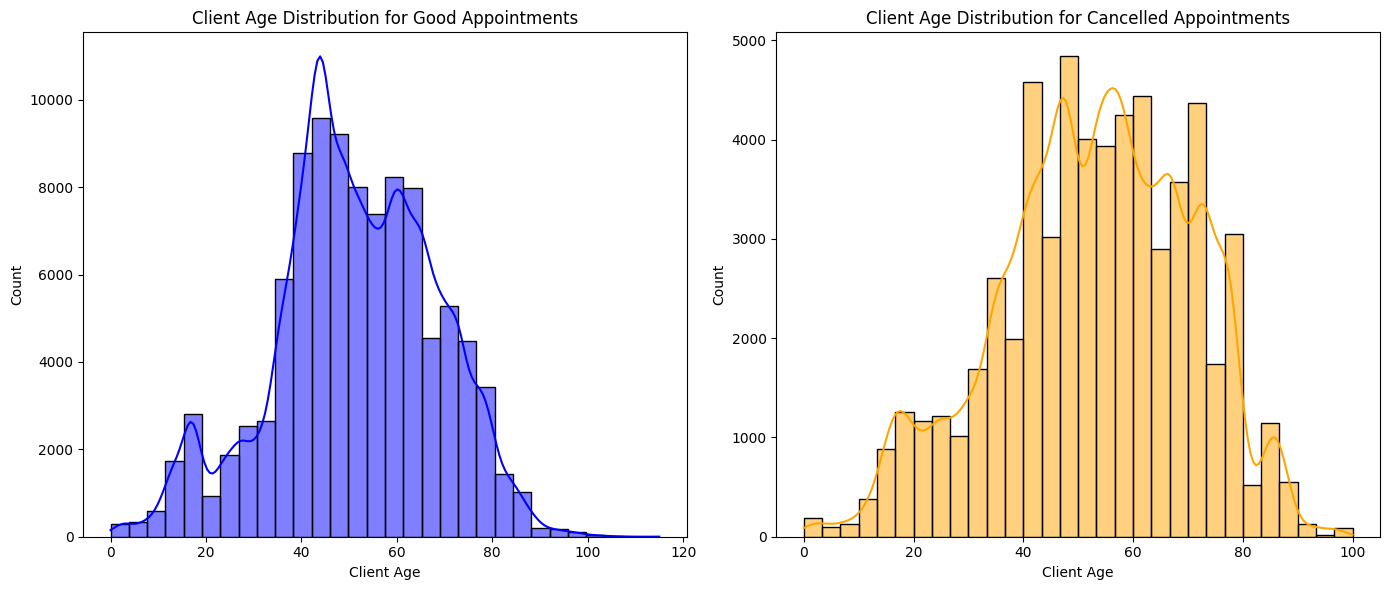

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Assuming the current date is '2024-06-06'
current_date = pd.to_datetime('2024-06-06')

# Convert the birth date to datetime
good_apt_df['birth_date'] = pd.to_datetime(good_apt_df['date_of_birth'])
cancelled_apt_df['birth_date'] = pd.to_datetime(cancelled_apt_df['date_of_birth'])

# Calculate age
good_apt_df['client_age'] = (current_date - good_apt_df['birth_date']).dt.days // 365
cancelled_apt_df['client_age'] = (current_date - cancelled_apt_df['birth_date']).dt.days // 365

# Visualizing the impact of client age
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(good_apt_df['client_age'], bins=30, kde=True, color='blue')
plt.title('Client Age Distribution for Good Appointments')
plt.xlabel('Client Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(cancelled_apt_df['client_age'], bins=30, kde=True, color='orange')
plt.title('Client Age Distribution for Cancelled Appointments')
plt.xlabel('Client Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Billing and Concession

In [19]:
final_df['concession_type'].dropna().value_counts()

concession_type
Concession Discount                 13652
Concession / Pension Card Holder     5724
VIP Discount                         1867
Student                              1294
VIP + Concession Discount             315
WorkCover                              27
Patient is under 18 years old          22
Students | Under 18 Years Old          19
Medicare                               16
Third Party                            13
Concession Card Holders                10
Pensioners                              9
Pensioner / Concession                  7
NDIS                                    5
DVA                                     4
Concession/Pensioner                    3
Students                                2
Name: count, dtype: int64

In [20]:
billing = final_df.groupby([final_df['concession_type'].dropna().str.upper().str.strip(), 'cancelled']).size().reset_index(name='count')
fig = px.histogram(billing, x="concession_type", y="count", color='cancelled')
fig.show()

# Case Type 

In [21]:
final_df['opened_case_name'].value_counts()

opened_case_name
Opened     47331
Expired    23830
Closed     13956
Name: count, dtype: int64

In [22]:
billing = final_df.groupby([final_df['opened_case_name'].dropna(), 'cancelled']).size().reset_index(name='count')
fig = px.histogram(billing, x="opened_case_name", y="count", color='cancelled')
fig.show()
# Use No plan insted of missing values and show percentages

# Total Good Appointments

### Total number of Good appointments are mostly those appointments which have no appointment before this. This shows that the new patients are coming to the clinic, but Recurring patients are cancelling there appointments. 
### So we should have to consider about our services, what's the fault in our system, that patients not coming again.

In [23]:
billing = final_df.groupby([final_df['total_good_appointments_before_cancelled_appointment'].dropna(), 'cancelled']).size().reset_index(name='count')
fig = px.histogram(billing, x="total_good_appointments_before_cancelled_appointment", y="count", color='cancelled')
fig.show()

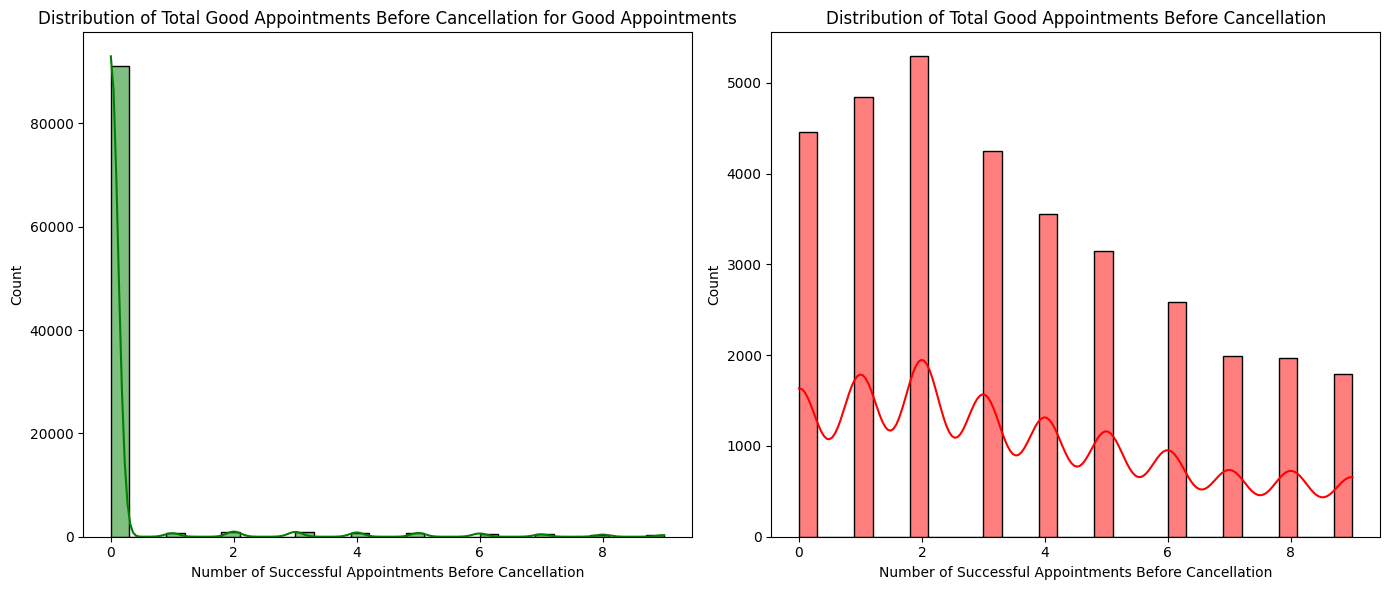

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter datasets to include only records where total_good_appointments_before_cancelled_appointment is less than 10
good_appt_filtered = good_apt_df[good_apt_df['total_good_appointments_before_cancelled_appointment'] < 10]
cancelled_appt_filtered = cancelled_apt_df[cancelled_apt_df['total_good_appointments_before_cancelled_appointment'] < 10]

# Visualize the distribution of total_good_appointments_before_cancelled_appointment for good appointments
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(good_appt_filtered['total_good_appointments_before_cancelled_appointment'], bins=30, kde=True, color='green')
plt.title('Distribution of Total Good Appointments Before Cancellation for Good Appointments')
plt.xlabel('Number of Successful Appointments Before Cancellation')
plt.ylabel('Count')

# Visualize the distribution of total_good_appointments_before_cancelled_appointment for cancelled appointments
plt.subplot(1, 2, 2)
sns.histplot(cancelled_appt_filtered['total_good_appointments_before_cancelled_appointment'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Good Appointments Before Cancellation')
plt.xlabel('Number of Successful Appointments Before Cancellation')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Type of Appointment Status

### This shows that two types of servies are not good accoeding to the data, most of the cancellations are done by due to these services.
## !. Physiotherapy, 30 Minutes Follow Up
## 2. Subsequant Consultaion Week Day

### These are the two departments we must have to focus on that. Due to these departments most of the time appointments are being cancelled.

In [25]:
column_used = "appointment_type"

apt_status = final_df['appointment_type'].value_counts().head(10)

fig = px.pie(values=apt_status.values, names=apt_status.index, title='Appointment Type Of Cancellation',
             labels={'labels':'Appointment Type', 'values':'Cancelled Appointments'})
fig.update_traces(textinfo='label+percent', hoverinfo='label+value', 
                  texttemplate='%{value:.0f}')
fig.show()

In [38]:
top_10_appointment_types = final_df['appointment_type'].value_counts().head(20).index
filtered_df = final_df[final_df['appointment_type'].isin(top_10_appointment_types)]
filtered_df['is_cancelled'] = filtered_df['cancelled'].apply(lambda x: 'Cancelled' if x == 1 else 'Not Cancelled')
fig = px.histogram(
    filtered_df,
    x='appointment_type',
    color='cancelled',
    barmode='stack',
    title='Top 10 Appointment Types with Respect to Cancelled Appointments',
    labels={'appointment_type': 'Appointment Type', 'count': 'Number of Appointments'},
    category_orders={'appointment_type': top_10_appointment_types}
)
fig.update_layout(
    xaxis_title='Appointment Type',
    yaxis_title='Number of Appointments',
    legend_title_text='Appointment Status'
)
fig.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9748\956249594.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Monthly Pattren

### There are almost same type of cancellations in every month. So that's not effect that much, or not any pattren in this.

In [27]:
billing = final_df.groupby([final_df['month_of_year'].dropna(), 'cancelled']).size().reset_index(name='count')
fig = px.histogram(billing, x="month_of_year", y="count", color='cancelled')
fig.show()

# Package Plan

### There is high probablity of cancellation of appointment if the patient has unlimited number of appointments.

In [28]:
billing = final_df.groupby([final_df['case_type'].dropna(), 'cancelled']).size().reset_index(name='count')
fig = px.histogram(billing, x="case_type", y="count", color='cancelled')
fig.show()

In [29]:
billing = final_df.groupby([final_df['business_name'].dropna(), 'cancelled']).size().reset_index(name='count')
fig = px.histogram(billing, x="business_name", y="count", color='cancelled')
fig.show()

In [30]:
billing = final_df.groupby([final_df['patient_type'].dropna(), 'cancelled']).size().reset_index(name='count')
fig = px.histogram(billing, x="patient_type", y="count", color='cancelled')
fig.show()

In [31]:
billing = final_df.groupby([final_df['customer_type'].dropna(), 'cancelled']).size().reset_index(name='count')
fig = px.histogram(billing, x="customer_type", y="count", color='cancelled')
fig.show()

<!-- Columns to Discuss -->

1) sessions_left
2) cancelled_at
3) case_type
4) cancelled_at
5) customer_type

In [ ]:
# Calculate percentage for customer type